<a href="https://colab.research.google.com/github/turabrasool/NLP-QUIZ-2/blob/main/NLP%20Q2%20F2021065159.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install necessary libraries (if required)
!pip install scikit-learn nltk matplotlib wordcloud


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [3]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [8]:
# Load dataset
df = pd.read_csv('/content/tweet_emotions.csv')  # Replace with your actual dataset path

# Inspect the dataset
df.head()


,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [12]:
import nltk

# Download required NLTK data (punkt tokenizer)
nltk.download('punkt')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    """Preprocess the text: lowercase, remove punctuation, tokenize, and lemmatize."""
    # Lowercase
    text = text.lower()

    # Remove punctuation and non-alphabetic characters
    text = re.sub(r'[^a-z\s]', '', text)

    # Tokenize
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

# Apply preprocessing to the 'text' column in the dataset
df['processed_text'] = df['content'].apply(preprocess_text)

# Inspect the processed text
df[['content', 'processed_text']].head()


,content,processed_text
0,@tiffanylue i know i was listenin to bad habi...,tiffanylue know listenin bad habit earlier sta...
1,Layin n bed with a headache ughhhh...waitin o...,layin n bed headache ughhhhwaitin call
2,Funeral ceremony...gloomy friday...,funeral ceremonygloomy friday
3,wants to hang out with friends SOON!,want hang friend soon
4,@dannycastillo We want to trade with someone w...,dannycastillo want trade someone houston ticke...


In [14]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most important features
X = tfidf_vectorizer.fit_transform(df['processed_text'])

# Display the shape of the TF-IDF matrix (number of samples x number of features)
X.shape


(40000, 5000)

In [16]:
# Split the dataset into training and testing sets
y = df['sentiment']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Naive Bayes classifier
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train, y_train)

# Make predictions
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 31.71%
Classification Report:
               precision    recall  f1-score   support

       anger       0.00      0.00      0.00        19
     boredom       0.00      0.00      0.00        31
       empty       0.00      0.00      0.00       162
  enthusiasm       0.00      0.00      0.00       163
         fun       0.00      0.00      0.00       338
   happiness       0.35      0.27      0.30      1028
        hate       0.00      0.00      0.00       268
        love       0.52      0.27      0.36       762
     neutral       0.30      0.55      0.39      1740
      relief       0.00      0.00      0.00       352
     sadness       0.35      0.11      0.17      1046
    surprise       0.50      0.00      0.00       425
       worry       0.29      0.59      0.39      1666

    accuracy                           0.32      8000
   macro avg       0.18      0.14      0.12      8000
weighted avg       0.29      0.32      0.26      8000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
# Topic Modeling using LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(X)

# Display the top words for each topic
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    print(f"Topic #{idx + 1}:")
    print([tfidf_feature_names[i] for i in topic.argsort()[-5:]])  # Show top 5 words for each topic


Topic #1:
['suck', 'mom', 'mother', 'happy', 'day']
Topic #2:
['new', 'im', 'hurt', 'love', 'like']
Topic #3:
['know', 'love', 'im', 'thank', 'thanks']
Topic #4:
['work', 'going', 'go', 'na', 'im']
Topic #5:
['day', 'time', 'im', 'morning', 'good']


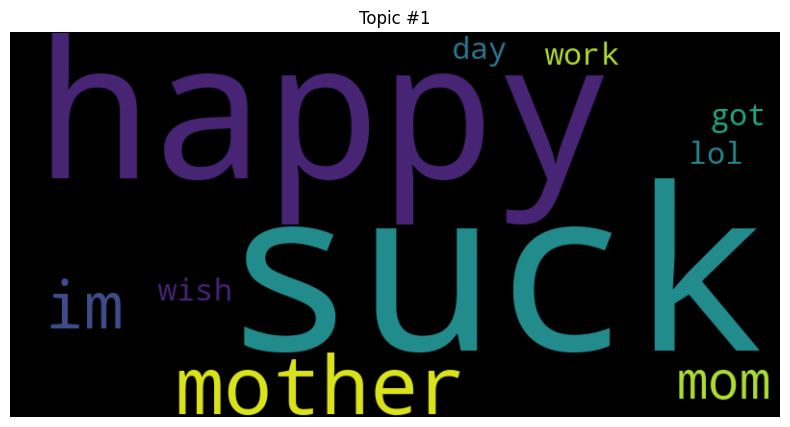

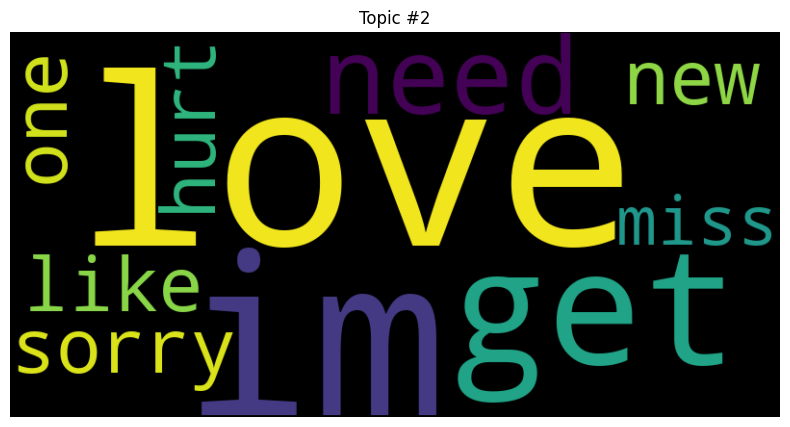

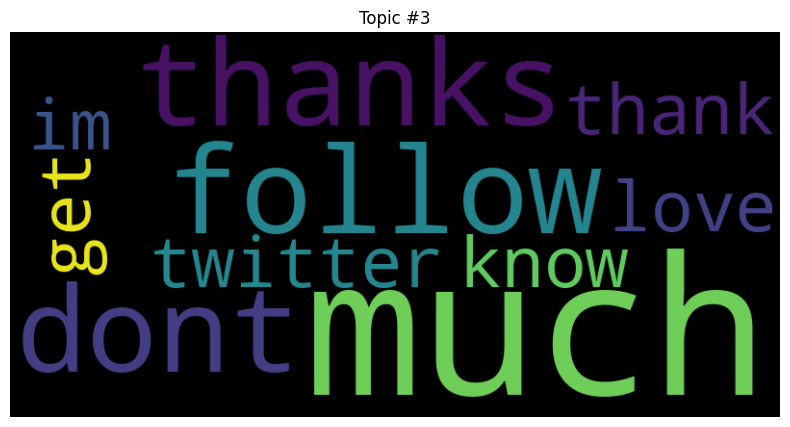

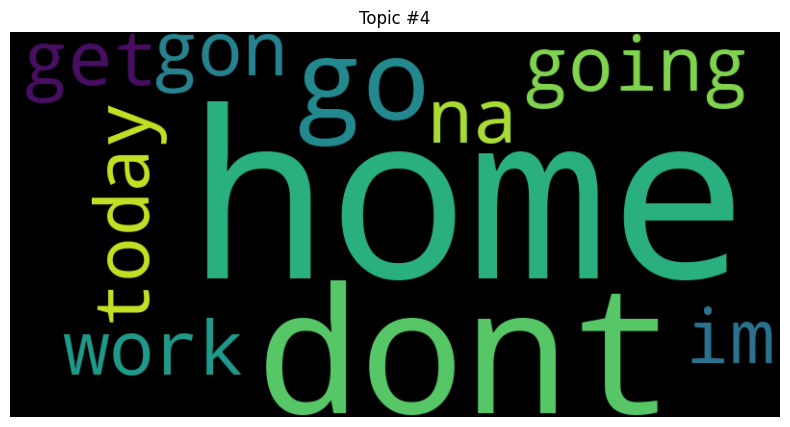

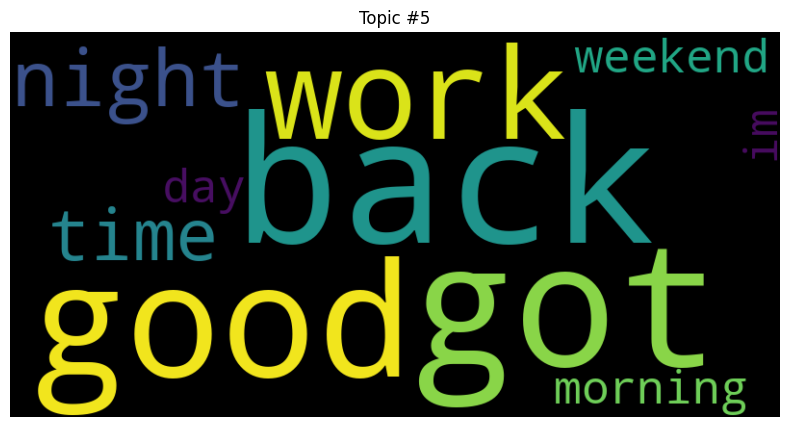

In [18]:
# Visualize topics using WordCloud
for idx, topic in enumerate(lda.components_):
    topic_words = [tfidf_feature_names[i] for i in topic.argsort()[-10:]]  # Top 10 words for the topic
    topic_word_freq = {word: topic[i] for i, word in enumerate(topic_words)}

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(topic_word_freq)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic #{idx + 1}')
    plt.show()


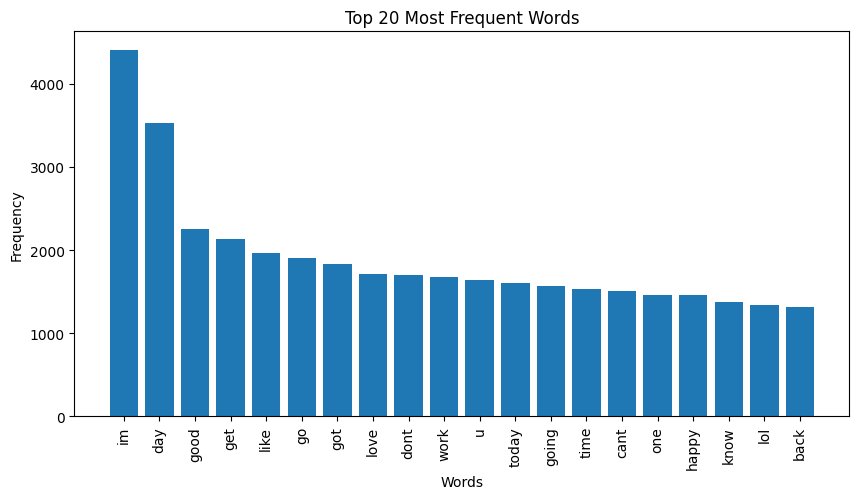

In [19]:
# Visualize the top 20 most common words in the corpus
from collections import Counter

# Get word frequencies
all_words = ' '.join(df['processed_text']).split()
word_freq = Counter(all_words)

# Plot the top 20 most common words
common_words = word_freq.most_common(20)
words, freqs = zip(*common_words)

plt.figure(figsize=(10, 5))
plt.bar(words, freqs)
plt.xticks(rotation=90)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 20 Most Frequent Words')
plt.show()
